# This is the report template for the Assignment in CSCU9M3 Autumn 2022

## Follow these instructions:
- Save this file in the form: __ZZZZZZZ_M3_Aut22_TheAssignment.ipynb__ where __ZZZZZZZ__ is your student number
- Fill in the report 
 * Use a mix of code and markdown cells to tell a data-story, only the *Executive Summary* should be contained in a single markdown cell
 * all other sections should have multiple cells and outputs, where you explain what you are doing and why.
- When you are finished then ...
 * Save the file
 * Restart the Kernel and re-run the whole notebook. "Kernel" -> "Restart & Run" in the menu at top
 * Make sure everything has executed as expected. If cells run with error that you want to keep to show your attempt, then manually run every cell below the faulty one to show the output.
 * Make sure no __Markdown__ cell is in *edit* mode
 * Save file again
 * Delete this cell and remove any instructions from the template (except headings)
 * __Download this notebook as HTML__, you do that under *File->Download 1as-> HTML*
   + make sure to use the same name format, just different extension
 * __Upload the html file__ to the assessment on VLE and submit

## Executive Summary
Write a short (200 words max) summary of what the report contains and what you have discovered.

通过导入两个数据，进行删除缺失值比例多的，对一般缺失值少的的数据进行众数填充，进行数据清洗。
筛选数据中top20的country_code,sen数量最多
展示最多的SeriesCode，每年的变化趋势不断上升，在1990年趋于稳定
展示Periodicity与topic的对比数量，periodicty为0，topic分布广范，较狭长，其他两者分布集中在0，1左右。
展示不同topic的source关系，topic为1，和8时suorce,分布最广
展示第一个表格相关性的热图,各个属性列相关性不大
展示第二个表格相关性的热图,各个属性列相关性不大
展示第二个表格的成对关系，如图所示



## Introduction
Write a short (200 words max) introduction to the dataset, emphasising why you chose it and what you expect to discover (what you expect to discover does not have to be what you then eventually discover)

第一个表数据为CountryCode(国家代码),SeriesCode(系列代码),Year(年份)，DESCRIPTION(描述).
第二个表数据Topic(话题)，Long definition（定义），Periodicity(周期性），Source（来源）

## Data Cleaning
In this section should demonstrate how you have programmatically cleaned and prepared the dataset you have chosen.
Explain the steps you take.

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [254]:
df1=pd.read_csv('Gender_Stats_csv_0\Gender_StatsFootNote.csv')
df2=pd.read_csv('Gender_Stats_csv_0\Gender_StatsSeries.csv')


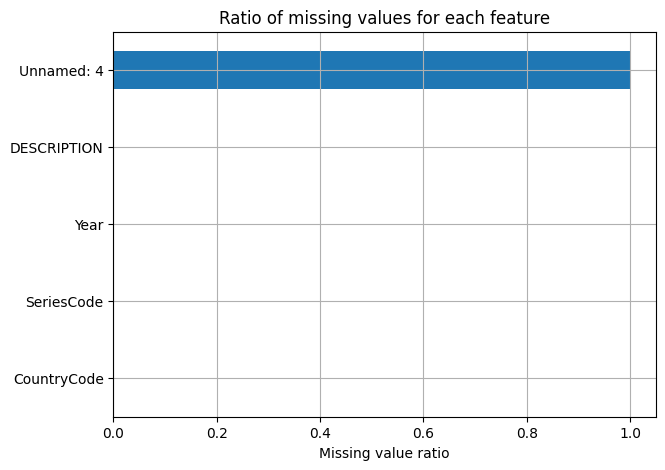

In [255]:
plt.figure(figsize= (7,5))
df1.isnull().mean().sort_values().plot (kind ='barh')
plt.grid()
plt.xlabel("Missing value ratio")
plt.title("Ratio of missing values for each feature")
plt.show()#展示缺失值比例

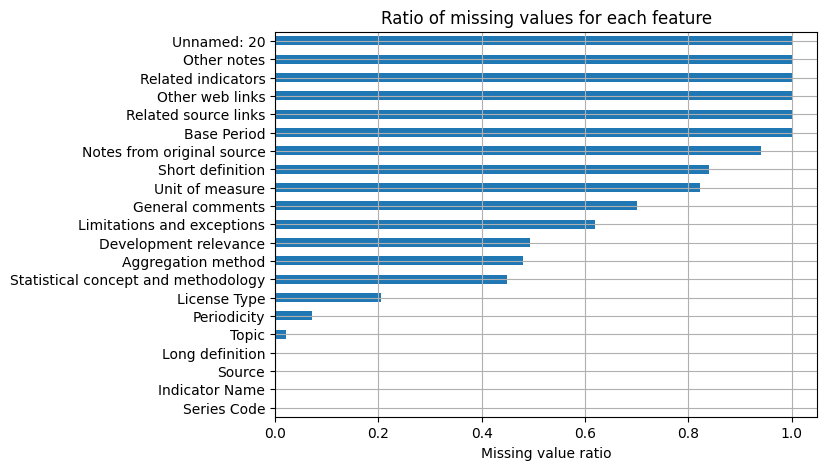

In [256]:
plt.figure(figsize= (7,5))
df2.isnull().mean().sort_values().plot (kind ='barh')
plt.grid()
plt.xlabel("Missing value ratio")
plt.title("Ratio of missing values for each feature")#展示缺失值比例
plt.show()

In [257]:
df2.drop(columns= df2.isnull().mean().sort_values().sort_values(ascending=False).index[:14],inplace=True)#删除缺失值比例大于0.4的

In [258]:
df2['License Type'].value_counts()
df2['License Type'].fillna('CC BY-4.0 ',inplace=True)#通过众数填充

In [259]:
a=df2['Periodicity'].value_counts().index[0]
df2['License Type'].fillna(a,inplace=True)
#通过众数填充

In [260]:
b=df2['Topic'].value_counts().index[0]
df2['Topic'].fillna(b,inplace=True)
#通过众数填充

In [262]:
print(len(df2['Series Code']),len(df2['Series Code'].unique()))
print(df2['License Type'].unique())
del df2['Series Code']
del df2['License Type']#删除无分类属性的列

991 991
['CC BY-4.0 ' 'CC BY-4.0']


In [263]:
df2['Indicator Name'].value_counts()
del df2['Indicator Name']

In [264]:
df2['Source'].value_counts()

Demographic and Health Surveys (DHS)                                                                                                                                                                                                                                                                                                                                                                 194
Global Findex database                                                                                                                                                                                                                                                                                                                                                                               135
UNESCO Institute for Statistics (http://uis.unesco.org/). Data as of September 2021.                                                                                                                                  

In [265]:
df2['Long definition'].value_counts()

Female share of graduates in the given field of education, tertiary is the number of female graduates expressed as a percentage of the total number of graduates in the given field of education from tertiary education.                                                                                                                                                                                                                                                                                                                                                                                        13
Labor force participation rate for ages 15-24 is the proportion of the population ages 15-24 that is economically active: all people who supply labor for the production of goods and services during a specified period.                                                                                                                                                                                           

In [266]:
del df1['Unnamed: 4']
df1['Year']=df1['Year'].str.extract(r'(\d+)')#对第一个表格，对年份数值化。

In [275]:
df2

,Topic,Long definition,Periodicity,Source
0,Assets,The percentage of respondents who report havin...,Triennial,Global Findex database
1,Assets,The percentage of respondents who report havin...,Triennial,Global Findex database
2,Assets,The percentage of respondents who report havin...,Triennial,Global Findex database
3,Technology,The percentage of respondents who report using...,Triennial,Global Findex database
4,Technology,The percentage of respondents who report using...,Triennial,Global Findex database
...,...,...,...,...
986,Education,Number of females of official upper secondary ...,NaN,UNESCO Institute for Statistics (http://uis.un...
987,Education,Number of males of official upper secondary sc...,NaN,UNESCO Institute for Statistics (http://uis.un...
988,Violence,"Intentional homicides, female are estimates of...",Annual,UN Office on Drugs and Crime's International H...
989,Violence,"Intentional homicides, male are estimates of u...",Annual,UN Office on Drugs and Crime's International H...


## Exploratory Data Analysis
Programmatically explore the dataset. Tell the reader, how the dataset looks like and at least three most interesting observations that you can learn from the data.

<BarContainer object of 20 artists>

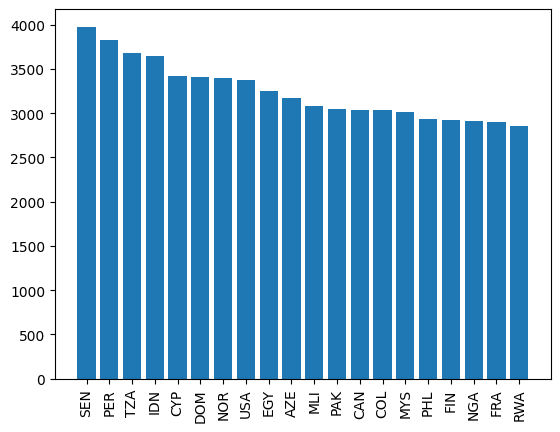

In [267]:
#筛选数据中top20的country_code
a=df1['CountryCode'].value_counts()[:20]
plt.xticks(rotation=90)
plt.bar(a.index,a)

Year
1960    120
1961    121
1962    123
1963    126
1964    129
       ... 
2016    205
2017    205
2018    205
2019    205
2020    205
Name: Year, Length: 61, dtype: int64

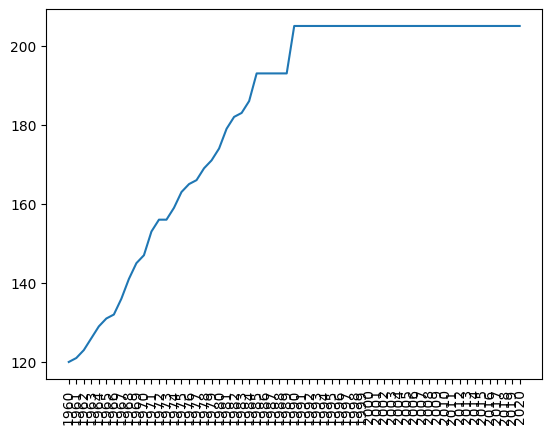

In [268]:
#展示最多的SeriesCode，每年的变化趋势
a=df1.groupby('SeriesCode')['Year'].value_counts()
b=df1['SeriesCode'].value_counts().index[0]
d=a[b]
d.sort_index(inplace=True)
plt.xticks(rotation=90)
plt.plot(d.index,d)
d

In [269]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cate_col1=df1.select_dtypes('object').columns
cate_col2=df2.select_dtypes('object').columns
df11=df1.copy()
df22=df2.copy()


for  i in cate_col1:
    df11.loc[:,i]=le.fit_transform(df1.loc[:,i])
for  i in cate_col2:
    df22.loc[:,i]=le.fit_transform(df2.loc[:,i])#将所有字符串属性转化为数值标签

C:\Users\tang xiaoqing\AppData\Local\Temp\ipykernel_8272\484529058.py:10: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df11.loc[:,i]=le.fit_transform(df1.loc[:,i])
C:\Users\tang xiaoqing\AppData\Local\Temp\ipykernel_8272\484529058.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df22.loc[:,i]=le.fit_transform(df2.loc[:,i])#将所有字符串属性转化为数值标签


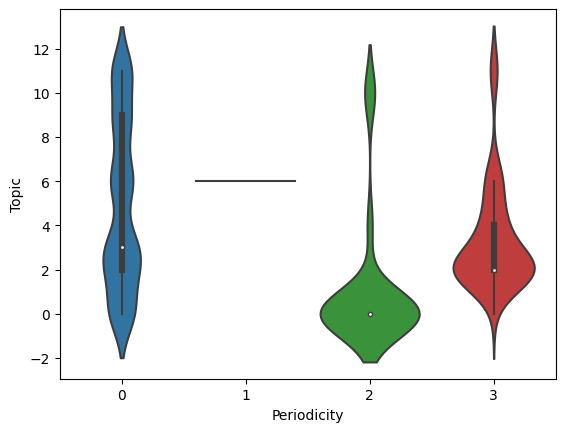

In [270]:
#展示Periodicity与topic的对比数量
sns.violinplot(x = 'Periodicity', y = 'Topic', data=df22)
plt.show()

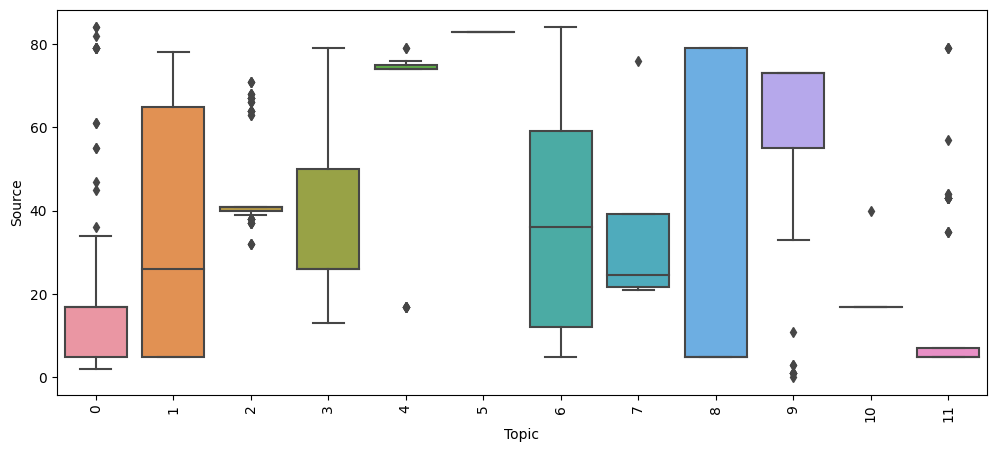

In [271]:
#展示不同topic的source关系
plt.figure(figsize = (12,5))
sns.boxplot(x = 'Topic', y = 'Source', data=df22)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: >

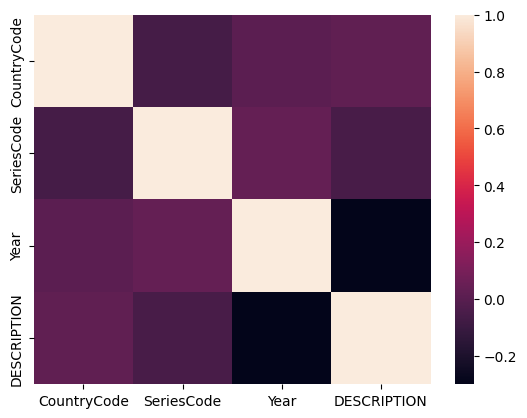

In [272]:
df1_corr=df11.corr()
sns.heatmap(df1_corr)#展示第一个表格相关性的热图

<AxesSubplot: >

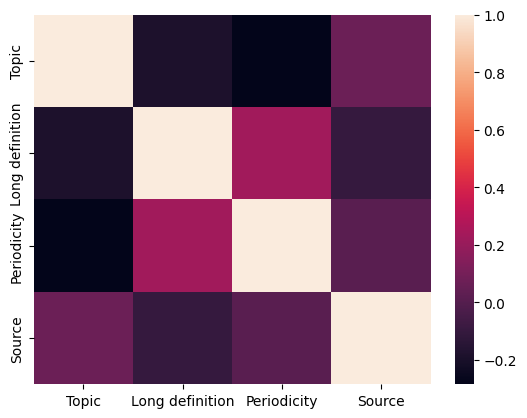

In [273]:
df2_corr=df22.corr()
sns.heatmap(df2_corr)#展示第二个表格相关性的热图

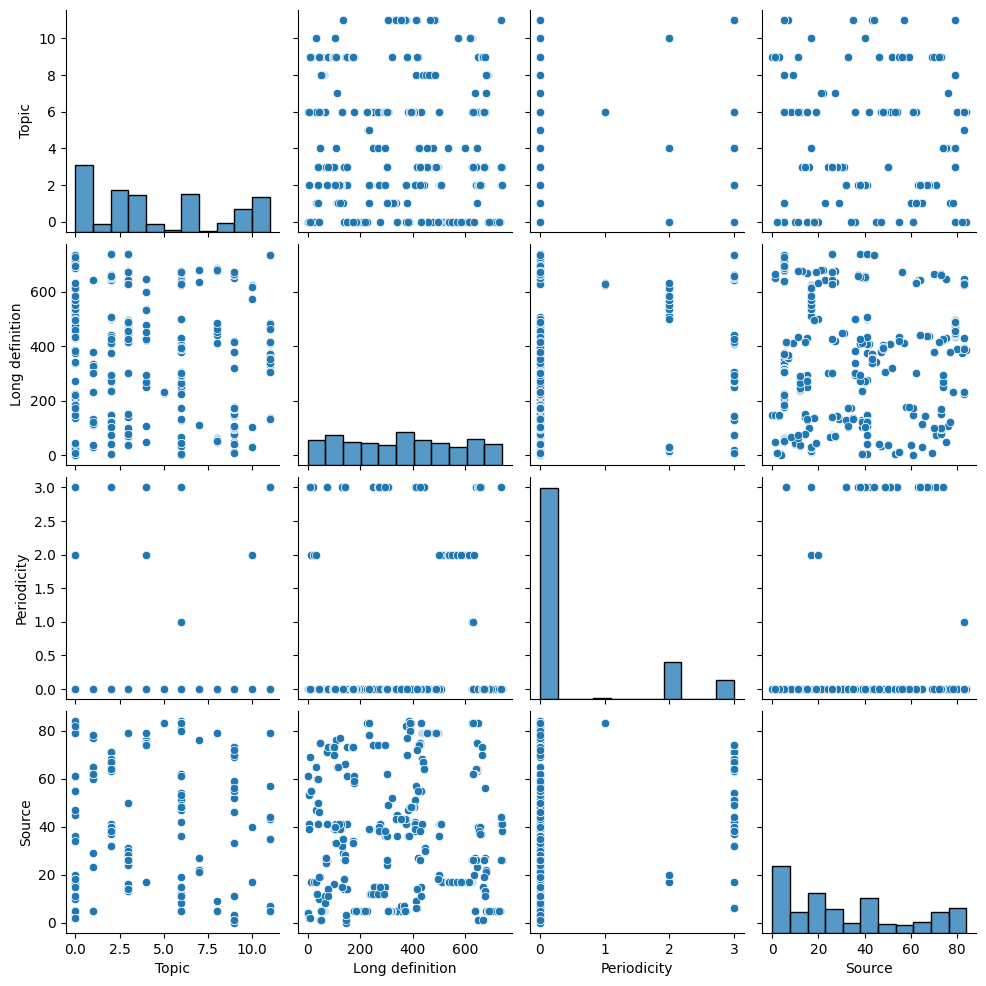

In [274]:
sns.pairplot(df22)#展示第二个表格的成对关系

## Descriptive Analytics
Interogate the dataset with descriptive analytics. Answer 3 questions that you find interesting, and that can be answered using descriptive analytics. Make each question a subsection of this section and follow the steps: 1. the question, 2. justify why it is interesting 3. the answer.

## Suggestions
Suggest further steps to enrich the dataset with additional (external) data, or apply some additional advanced modelling or analysis. You do not have to fully implement your suggestions, but you will have to explain and justify your suggestions.

## Bibliography
List all sources you have utilised in the making of this report here.